In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib as mpl


import numpy as np
import pandas as pd

import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, extract

In [3]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation 
#data and plot the results
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
one_y_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_y_ago

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_y_ago).all()
# add this code to sort before df .order_by(Measurement.date).all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame and set the 
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df.head(10)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [14]:
#index to the date column
precipitation_df = precipitation_df.sort_values("date")
prcp_df_indexed = precipitation_df.set_index('date')
#prcp_df_indexed.index.names = ['Date']

prcp_df_indexed.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


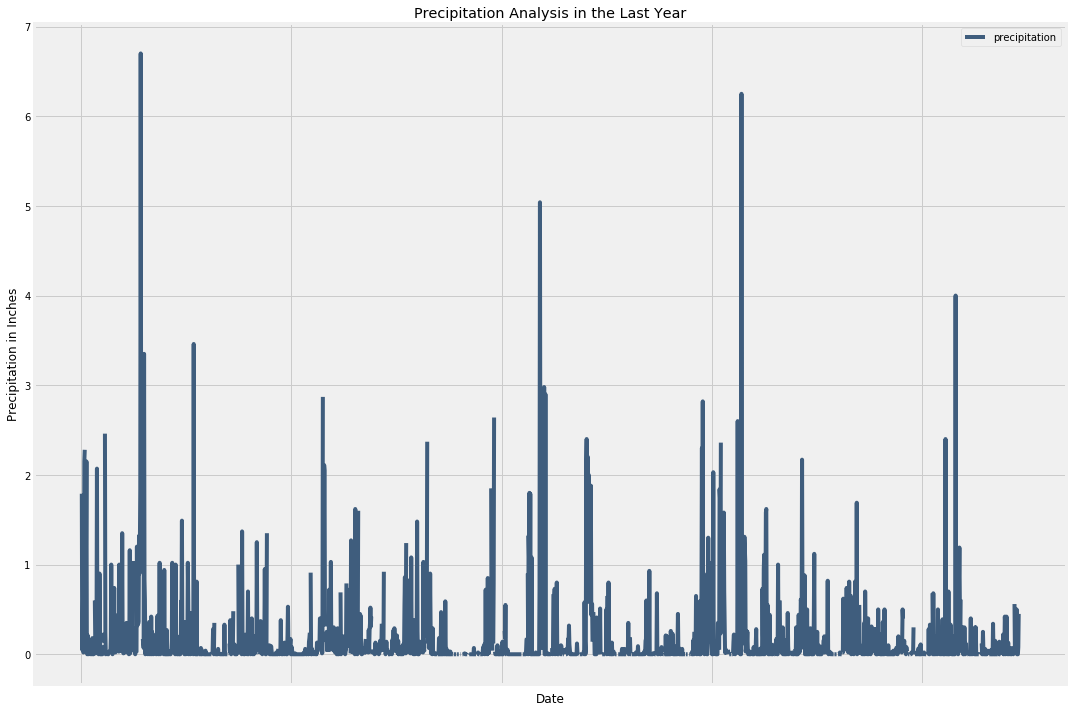

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df_indexed.plot(kind='line', x_compat=True,figsize=(15,10), color='#3F5D7D')

plt.xlabel('Date')
plt.title("Precipitation Analysis in the Last Year")
plt.ylabel('Precipitation in Inches')
#plt.grid(bool, linewidth=2)
plt.tight_layout()
plt.xticks(rotation=45)

plt.savefig("Precipitation_analysis_graph.png", bbox_inches="tight");
plt.show()

In [16]:
prcp_df_indexed.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [17]:
# Design a query to show how many stations are available in this dataset?
n_stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"Stations = {n_stations}")

Stations = 9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
as_station = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
as_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
ma_station = as_station[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.station == ma_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [20]:
ma_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == ma_station).filter(Measurement.date >= one_y_ago).all()
ma_station_temp

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [21]:
temp_df = pd.DataFrame(ma_station_temp, columns=['Station', 'Tobs'])
temp_df.head(10)

,Station,Tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
5,USC00519281,73.0
6,USC00519281,78.0
7,USC00519281,77.0
8,USC00519281,78.0
9,USC00519281,80.0


In [22]:
temp_df = temp_df.set_index('Station')
temp_df.head(10)

,Tobs
Station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0
USC00519281,78.0
USC00519281,77.0
USC00519281,78.0


<function matplotlib.pyplot.show(*args, **kw)>

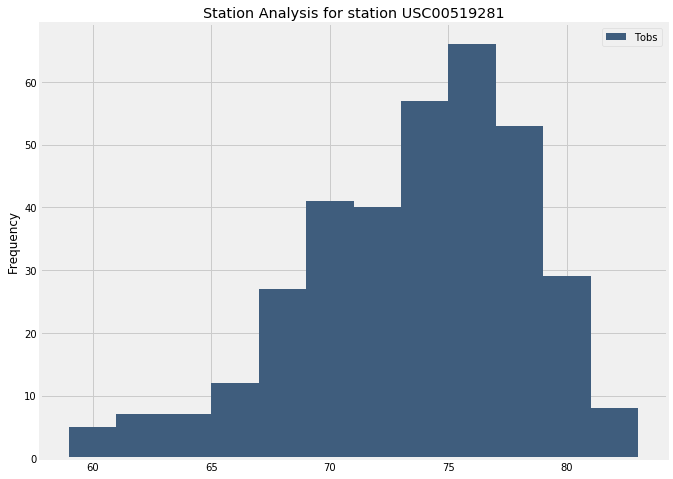

In [23]:
temp_df.plot.hist(by='Station', figsize=(10,8), color='#3F5D7D', bins =12)

plt.title('Station Analysis for station ' + ma_station)
plt.savefig("Station_analysis_hist.png", bbox_inches="tight");
plt.show

### Temperature Analysis (Optional)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
my_trip = calc_temps('2017-05-26','2017-06-10')
print(my_trip)

[(69.0, 76.96907216494846, 82.0)]


In [26]:
my_trip_df = pd.DataFrame(my_trip, columns=['min_temp', 'avg_temp', 'max_temp'])
my_trip_df.head()

,min_temp,avg_temp,max_temp
0,69.0,76.969072,82.0


In [27]:
y_error = my_trip_df['max_temp'] - my_trip_df['min_temp']
print(y_error)

0    13.0
dtype: float64


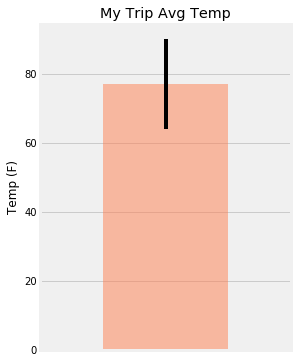

In [28]:
my_trip_df['avg_temp'].plot(kind='bar', yerr=(y_error), figsize=(4,6), alpha=0.5, color='coral')
plt.ylabel('Temp (F)')
plt.title("My Trip Avg Temp")
plt.grid(b=None, which='minor')
plt.xticks([])
plt.savefig("MyTrip_graph.png", bbox_inches="tight");
plt.show()